## Did the impeachment skew the polls significantly?
## Was it predicatable?

Let's review the timeline of everything before we start
 
- September-November : Inquiry
- December 18, 2020 : Impeached by US HoR
- January 16, 2020 : Passed the Senate
- February 5, 2020 : Acquitted

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression

Create a training and testing model

What was Donald Trump's approval rating during his impeachment trial?

In [2]:
approval_df = pd.read_csv("president_approval_polls.csv")
approval_df.head()

,question_id,poll_id,cycle,state,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no
0,119194,64608,2020.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,2/25/20,2/27/20,NaN,True,2/28/20 09:27,NaN,http://www.rasmussenreports.com/public_content...,538,47.0,52.0
1,119031,64571,2020.0,NaN,Donald Trump,1189,Morning Consult,NaN,NaN,Morning Consult,...,2/24/20,2/26/20,NaN,NaN,2/26/20 15:33,NaN,https://morningconsult.com/wp-content/uploads/...,538,42.0,53.0
2,119032,64571,2020.0,NaN,Donald Trump,1189,Morning Consult,NaN,NaN,Morning Consult,...,2/24/20,2/26/20,NaN,NaN,2/26/20 15:33,NaN,https://morningconsult.com/wp-content/uploads/...,538,43.0,55.0
3,119075,64583,2020.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,2/24/20,2/26/20,NaN,True,2/27/20 09:26,NaN,http://www.rasmussenreports.com/public_content...,538,52.0,47.0
4,119267,64591,2020.0,NaN,Donald Trump,590,Fox News/Beacon Research/Shaw & Co. Research,NaN,NaN,Fox News,...,2/23/20,2/26/20,NaN,NaN,2/28/20 18:00,NaN,https://www.scribd.com/document/449414637/Fox-...,538,47.0,52.0


In [3]:
approval_df.dtypes

question_id               int64
poll_id                   int64
cycle                   float64
state                   float64
politician               object
pollster_id               int64
pollster                 object
sponsor_ids              object
sponsors                 object
display_name             object
pollster_rating_id      float64
pollster_rating_name     object
fte_grade                object
sample_size               int64
population               object
population_full          object
methodology              object
start_date               object
end_date                 object
sponsor_candidate       float64
tracking                 object
created_at               object
notes                    object
url                      object
source                   object
yes                     float64
no                      float64
dtype: object

In [4]:
house = approval_df.loc[:330].copy()
house.tail()

,question_id,poll_id,cycle,state,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no
326,115079,63154,2019.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,12/16/19,12/18/19,NaN,True,12/19/19 09:31,NaN,http://www.rasmussenreports.com/public_content...,Rasmussen,49.0,49.0
327,115132,63177,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,12/16/19,12/18/19,NaN,NaN,12/23/19 13:11,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,42.0,51.0
328,115133,63177,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,12/16/19,12/18/19,NaN,NaN,12/23/19 13:11,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,44.0,54.0
329,115143,63183,2020.0,NaN,Donald Trump,294,McLaughlin & Associates,NaN,NaN,McLaughlin & Associates,...,12/14/19,12/18/19,NaN,NaN,12/23/19 14:41,NaN,https://mclaughlinonline.com/pols/wp-content/u...,538,46.0,53.0
330,114969,63145,2020.0,NaN,Donald Trump,744,Ipsos,71,Reuters,Ipsos,...,12/16/19,12/17/19,NaN,NaN,12/18/19 08:48,NaN,https://www.ipsos.com/sites/default/files/ct/n...,538,41.0,53.0


In [6]:
house_df = house.set_index('poll_id')
A = np.arange(len(house_df))
A = np.flip(A,0)
house_df['count'] = A
house_df.reset_index(inplace = True)
house_df.head()

,poll_id,question_id,cycle,state,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no,count
0,64608,119194,2020.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,2/27/20,NaN,True,2/28/20 09:27,NaN,http://www.rasmussenreports.com/public_content...,538,47.0,52.0,330
1,64571,119031,2020.0,NaN,Donald Trump,1189,Morning Consult,NaN,NaN,Morning Consult,...,2/26/20,NaN,NaN,2/26/20 15:33,NaN,https://morningconsult.com/wp-content/uploads/...,538,42.0,53.0,329
2,64571,119032,2020.0,NaN,Donald Trump,1189,Morning Consult,NaN,NaN,Morning Consult,...,2/26/20,NaN,NaN,2/26/20 15:33,NaN,https://morningconsult.com/wp-content/uploads/...,538,43.0,55.0,328
3,64583,119075,2020.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,2/26/20,NaN,True,2/27/20 09:26,NaN,http://www.rasmussenreports.com/public_content...,538,52.0,47.0,327
4,64591,119267,2020.0,NaN,Donald Trump,590,Fox News/Beacon Research/Shaw & Co. Research,NaN,NaN,Fox News,...,2/26/20,NaN,NaN,2/28/20 18:00,NaN,https://www.scribd.com/document/449414637/Fox-...,538,47.0,52.0,326


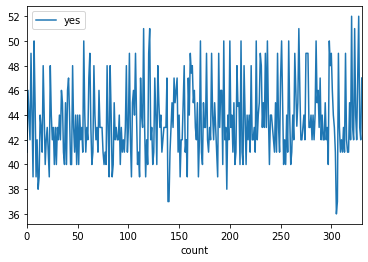

In [11]:
house_df.plot(kind='line', x='count', y='yes')